# Data Pre-Processing

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, make_scorer, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from zipfile import ZipFile
from pathlib import Path
import warnings
import time
import os
import numpy as np

from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

import glob

In [2]:
df = pd.read_parquet("newprocessedData.parquet")
df.shape

(1220336, 21)

In [3]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Flight_Number_Operating_Airline,Operating_Airline,DepartureDelayGroups,Origin,OriginState,Dest,DestState,DepDelay,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,AirTime,DepHourofDay
24572,2018,1,1,19,5,2018-01-19,5293,OO,0.0,CLT,NC,DEN,CO,11.0,1600,0.0,0.0,1337.0,6,213.0,16
24592,2018,1,1,19,5,2018-01-19,5315,OO,0.0,DEN,CO,DFW,TX,-3.0,1402,0.0,0.0,641.0,3,92.0,14
24685,2018,1,1,19,5,2018-01-19,5411,OO,0.0,LAX,CA,PHX,AZ,-4.0,815,0.0,0.0,370.0,2,56.0,8
24707,2018,1,1,19,5,2018-01-19,5435,OO,0.0,PHX,AZ,LAX,CA,6.0,1125,0.0,0.0,370.0,2,68.0,11
24708,2018,1,1,19,5,2018-01-19,5436,OO,0.0,PHX,AZ,LAX,CA,-9.0,1815,0.0,0.0,370.0,2,65.0,18


In [4]:
df.shape

(1220336, 21)

In [19]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Flight_Number_Operating_Airline,Operating_Airline,DepDel15,DepartureDelayGroups,Origin,OriginState,Dest,DestState,DepDelay,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,AirTime,DepHourofDay,DepDelay30,DepDelay45,DepDelay60,AWND_O,PRCP_O,SNOW_O,TAVG_O,AWND_D,PRCP_D,SNOW_D,TAVG_D
0,2022,1,1,6,4,2022-01-06,1582,DL,0.0,-1.0,ATL,GA,FLL,FL,-4.0,1631,0.0,0.0,581.0,3,93.0,16,0,0,0,47,13,0.0,92.0,NaN,NaN,NaN,NaN
1,2022,1,1,6,4,2022-01-06,1584,DL,0.0,-1.0,ATL,GA,JAN,MS,-4.0,1117,0.0,0.0,341.0,2,60.0,11,0,0,0,47,13,0.0,92.0,NaN,NaN,NaN,NaN
2,2022,1,1,6,4,2022-01-06,1587,DL,0.0,0.0,ATL,GA,RDU,NC,8.0,1414,0.0,0.0,356.0,2,55.0,14,0,0,0,47,13,0.0,92.0,NaN,NaN,NaN,NaN
3,2022,1,1,6,4,2022-01-06,1589,DL,0.0,-1.0,ATL,GA,IND,IN,-1.0,1235,0.0,0.0,432.0,2,64.0,12,0,0,0,47,13,0.0,92.0,NaN,NaN,NaN,NaN
4,2022,1,1,6,4,2022-01-06,1591,DL,0.0,-1.0,ATL,GA,SAV,GA,-4.0,820,0.0,0.0,214.0,1,37.0,8,0,0,0,47,13,0.0,92.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833949,2022,3,7,31,7,2022-07-31,2121,WN,0.0,0.0,SFO,CA,SAN,CA,4.0,2055,0.0,0.0,447.0,2,72.0,20,0,0,0,61,0,0.0,180.0,NaN,NaN,NaN,NaN
833950,2022,3,7,31,7,2022-07-31,2128,WN,0.0,0.0,SFO,CA,SAN,CA,9.0,1220,0.0,0.0,447.0,2,73.0,12,0,0,0,61,0,0.0,180.0,NaN,NaN,NaN,NaN
833951,2022,3,7,31,7,2022-07-31,2493,WN,1.0,5.0,SFO,CA,SAN,CA,76.0,525,0.0,0.0,447.0,2,71.0,5,1,1,1,61,0,0.0,180.0,NaN,NaN,NaN,NaN
833952,2022,3,7,31,7,2022-07-31,3025,WN,1.0,4.0,SFO,CA,SAN,CA,70.0,1725,0.0,0.0,447.0,2,69.0,17,1,1,1,61,0,0.0,180.0,NaN,NaN,NaN,NaN


# Checkking for null values in dataframe

In [5]:
df.isnull().sum(axis=0)

Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
FlightDate                         0
Flight_Number_Operating_Airline    0
Operating_Airline                  0
DepartureDelayGroups               0
Origin                             0
OriginState                        0
Dest                               0
DestState                          0
DepDelay                           0
CRSDepTime                         0
Cancelled                          0
Diverted                           0
Distance                           0
DistanceGroup                      0
AirTime                            0
DepHourofDay                       0
dtype: int64

# Dropping null values

In [4]:
df2=df.copy()
df2.dropna(axis=0, how='any', inplace=True)
df2.isnull().sum(axis=0)

Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
FlightDate                         0
Marketing_Airline_Network          0
Flight_Number_Operating_Airline    0
Operating_Airline                  0
DepDel15                           0
CRSArrTime                         0
Origin                             0
OriginState                        0
Dest                               0
DestState                          0
DepDelay                           0
CRSDepTime                         0
Cancelled                          0
Diverted                           0
Distance                           0
DistanceGroup                      0
ArrDelay                           0
ArrDel15                           0
AirTime                            0
dtype: int64

In [5]:
df2.drop('Marketing_Airline_Network', inplace=True, axis=1)

# Making a new column for departure hour and arrival hour for categorical data

In [6]:
df2['DepHourofDay'] = (df2['CRSDepTime']//100)
df2['ArrHourofDay'] = (df2['CRSArrTime']//100)

# Plotting the distribution in Arrival delay

> Visualizing the class proportion, we have that 1 fifth of the data is made up of flights that were delayed, i.e. 21% of flights were delayed.

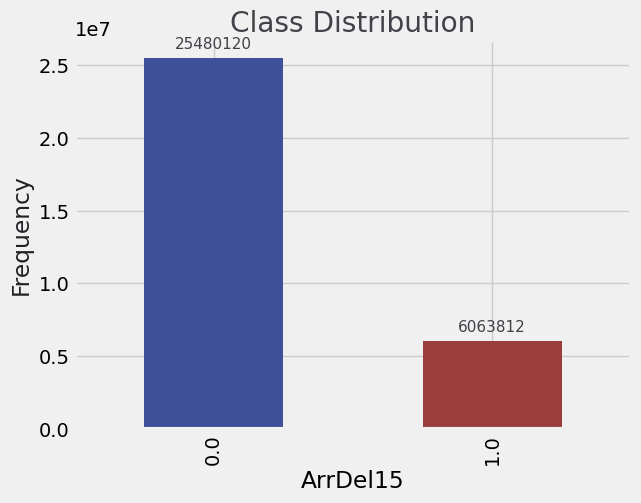

<Figure size 5400x2700 with 0 Axes>

In [11]:
# This was written after the presentation of the Chart
display(md(
'> Visualizing the class proportion, we have that 1 fifth \
of the data is made up of flights that were delayed, i.e. 21% \
of flights were delayed.'
))

# Calculating
class_distribution = df2['ArrDel15'].value_counts(normalize=0)

# Bar chart
ax = class_distribution.plot(kind='bar', color=['#3d5099', '#993d3d'])
plt.figure(figsize=(18,9), dpi = 300)

# Labels and title
ax.set_ylabel('Frequency', color='#202124'), ax.set_title('Class Distribution', color='#404248')

# APercentages in bars
for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11, color='#404248')

sns.despine()
plt.show();

# Plotting the distribution in Departure Delay

> Visualizing the class proportion, we have that 1 fifth of the data is made up of flights that were delayed, i.e. 21% of flights were delayed.

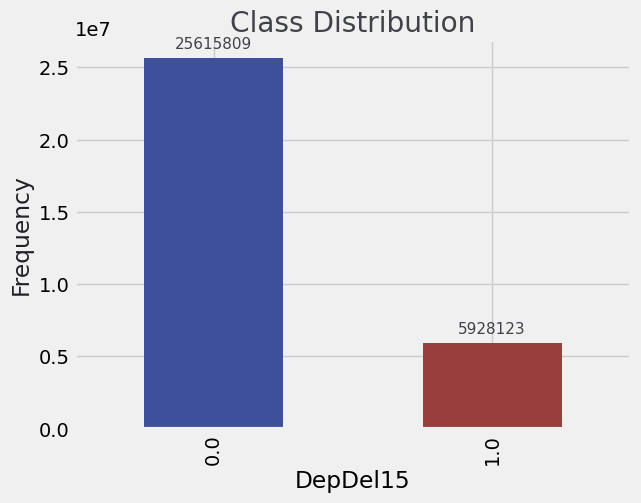

<Figure size 5400x2700 with 0 Axes>

In [12]:
# This was written after the presentation of the Chart
display(md(
'> Visualizing the class proportion, we have that 1 fifth \
of the data is made up of flights that were delayed, i.e. 21% \
of flights were delayed.'
))

# Calculating
class_distribution = df2['DepDel15'].value_counts(normalize=0)

# Bar chart
ax = class_distribution.plot(kind='bar', color=['#3d5099', '#993d3d'])
plt.figure(figsize=(18,9), dpi = 300)

# Labels and title
ax.set_ylabel('Frequency', color='#202124'), ax.set_title('Class Distribution', color='#404248')

# APercentages in bars
for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11, color='#404248')

sns.despine()
plt.show()

# Checking the impact of Arrival delay

> We have patterns present in the data set, these patternsrelated to data, which may be useful for the model. The time flight delays do not have a very high variation between them,in relation to origin and destination.

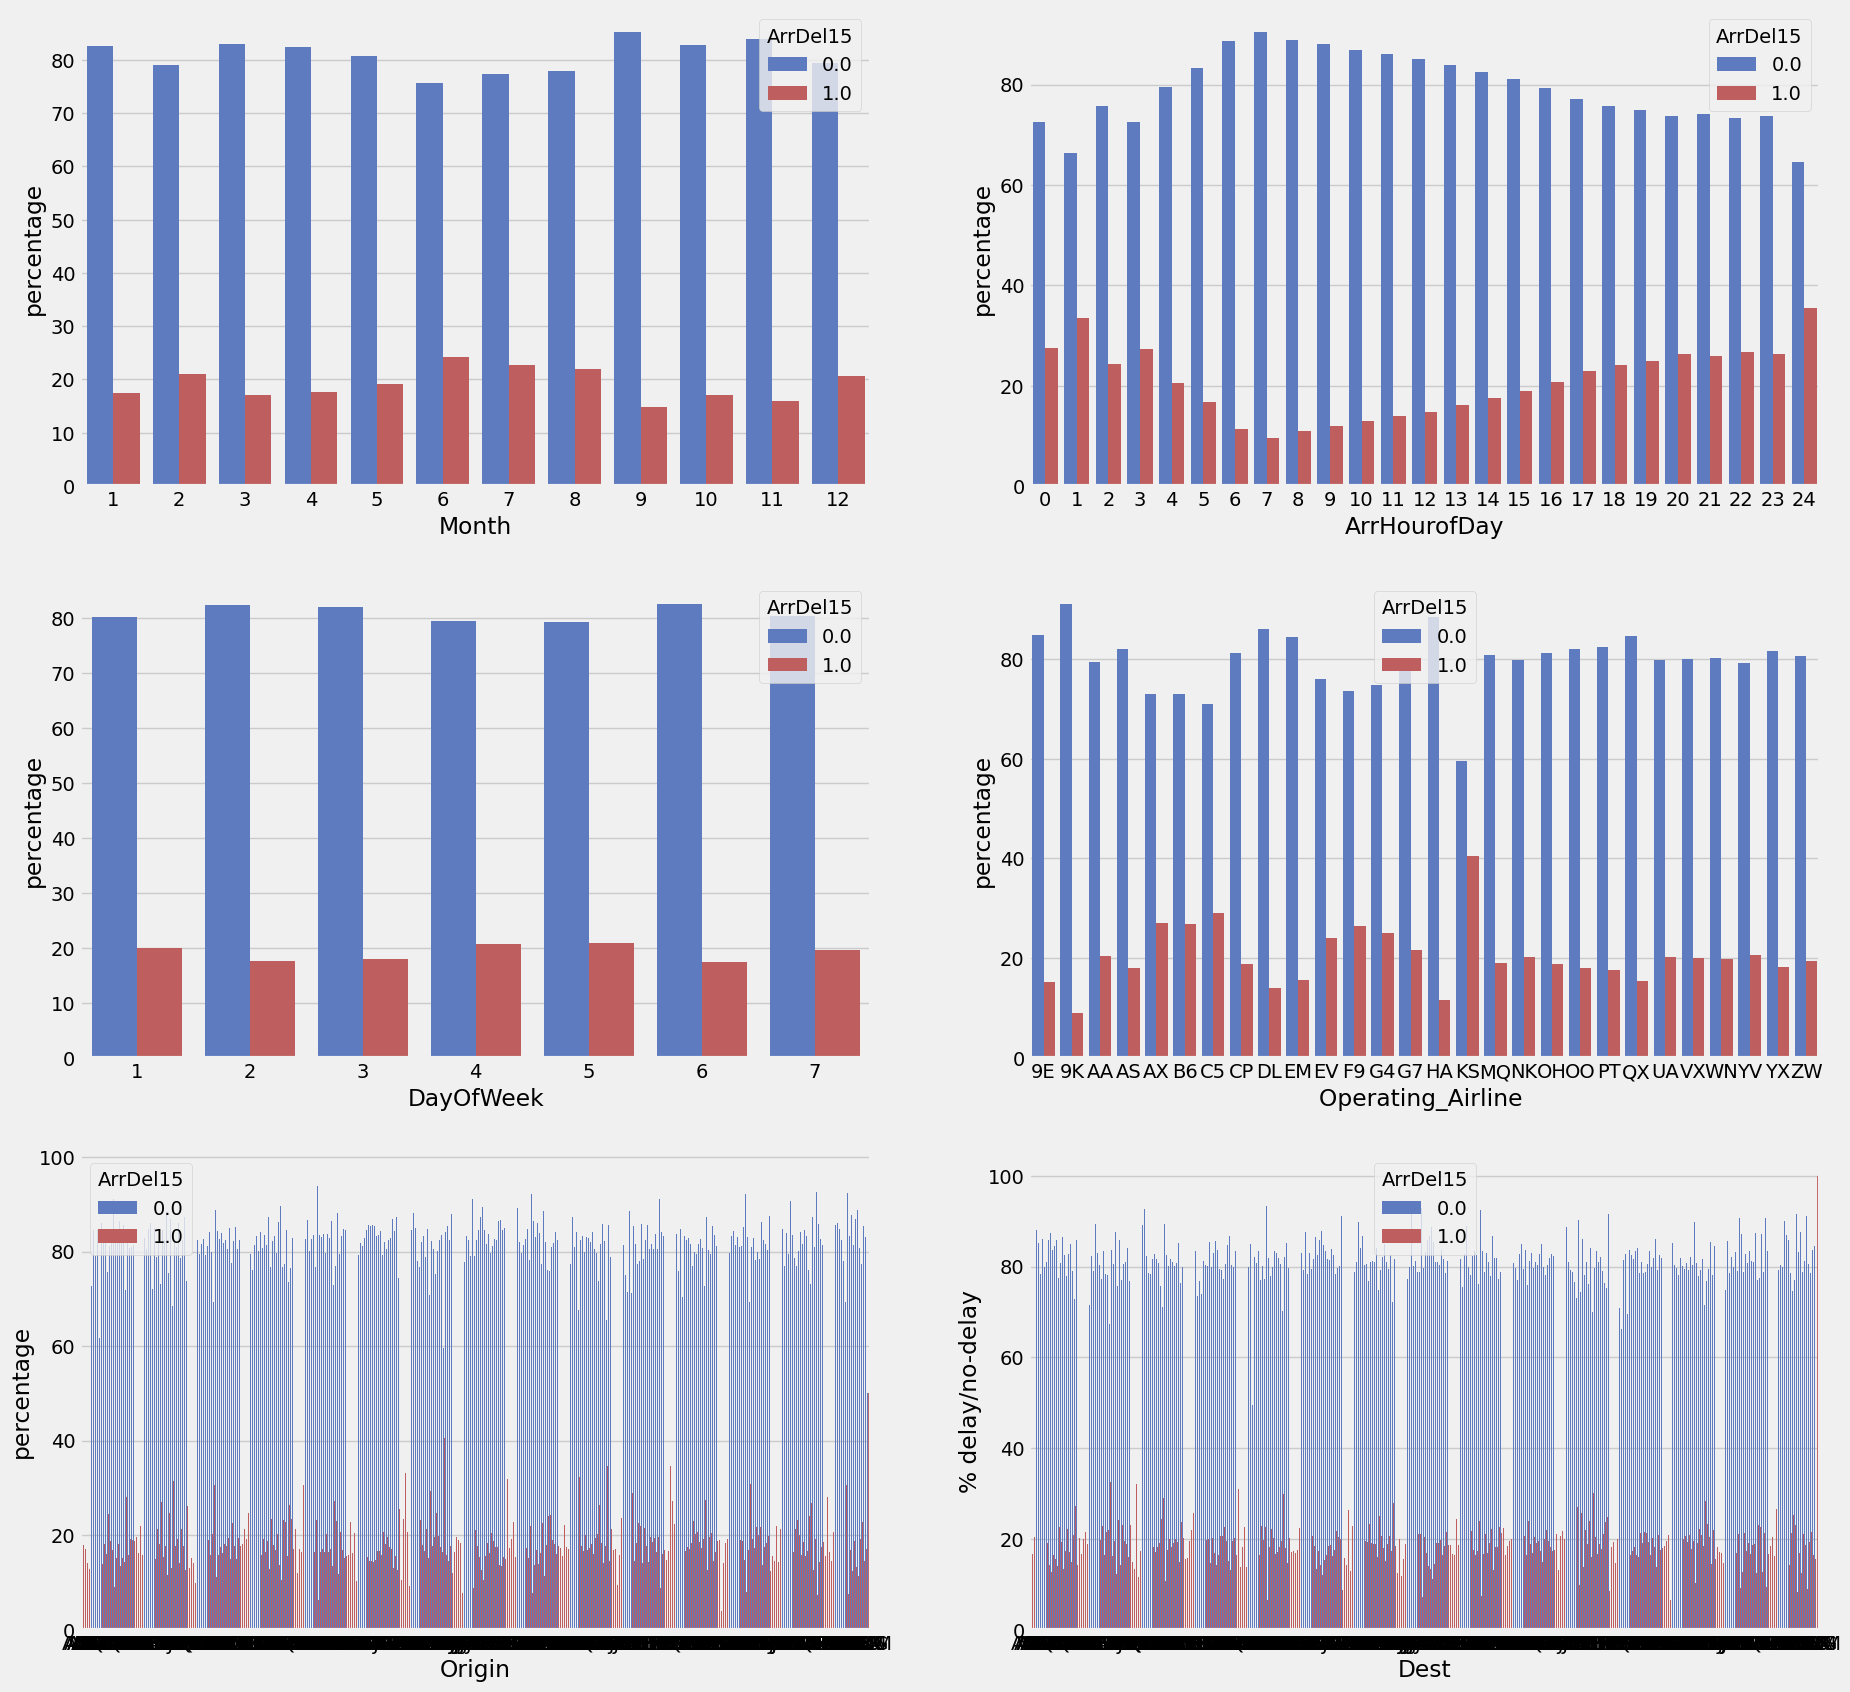

In [13]:
# This was written after the presentation of the Chart
display(md(
'> We have patterns present in the data set, these patterns\
related to data, which may be useful for the model. The time \
flight delays do not have a very high variation between them,\
in relation to origin and destination.'
))

viz_columns = ['Month', 'ArrHourofDay', 'DayOfWeek', 'Operating_Airline ', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
     ax = axes[idx//2, idx%2]
     temp = df2.groupby(column)['ArrDel15'].value_counts(normalize=True).rename('percentage').\
     mul(100).reset_index().sort_values(column)
     sns.barplot(x=column, y="percentage", hue="ArrDel15", data=temp, ax=ax, palette=['#4e75cf', '#cf4e4e'])
     plt.ylabel('% delay/no-delay')

plt.show()

# Checking the impact of Arrival delay

> We have patterns present in the data set, these patternsrelated to data, which may be useful for the model. The time flight delays do not have a very high variation between them,in relation to origin and destination.

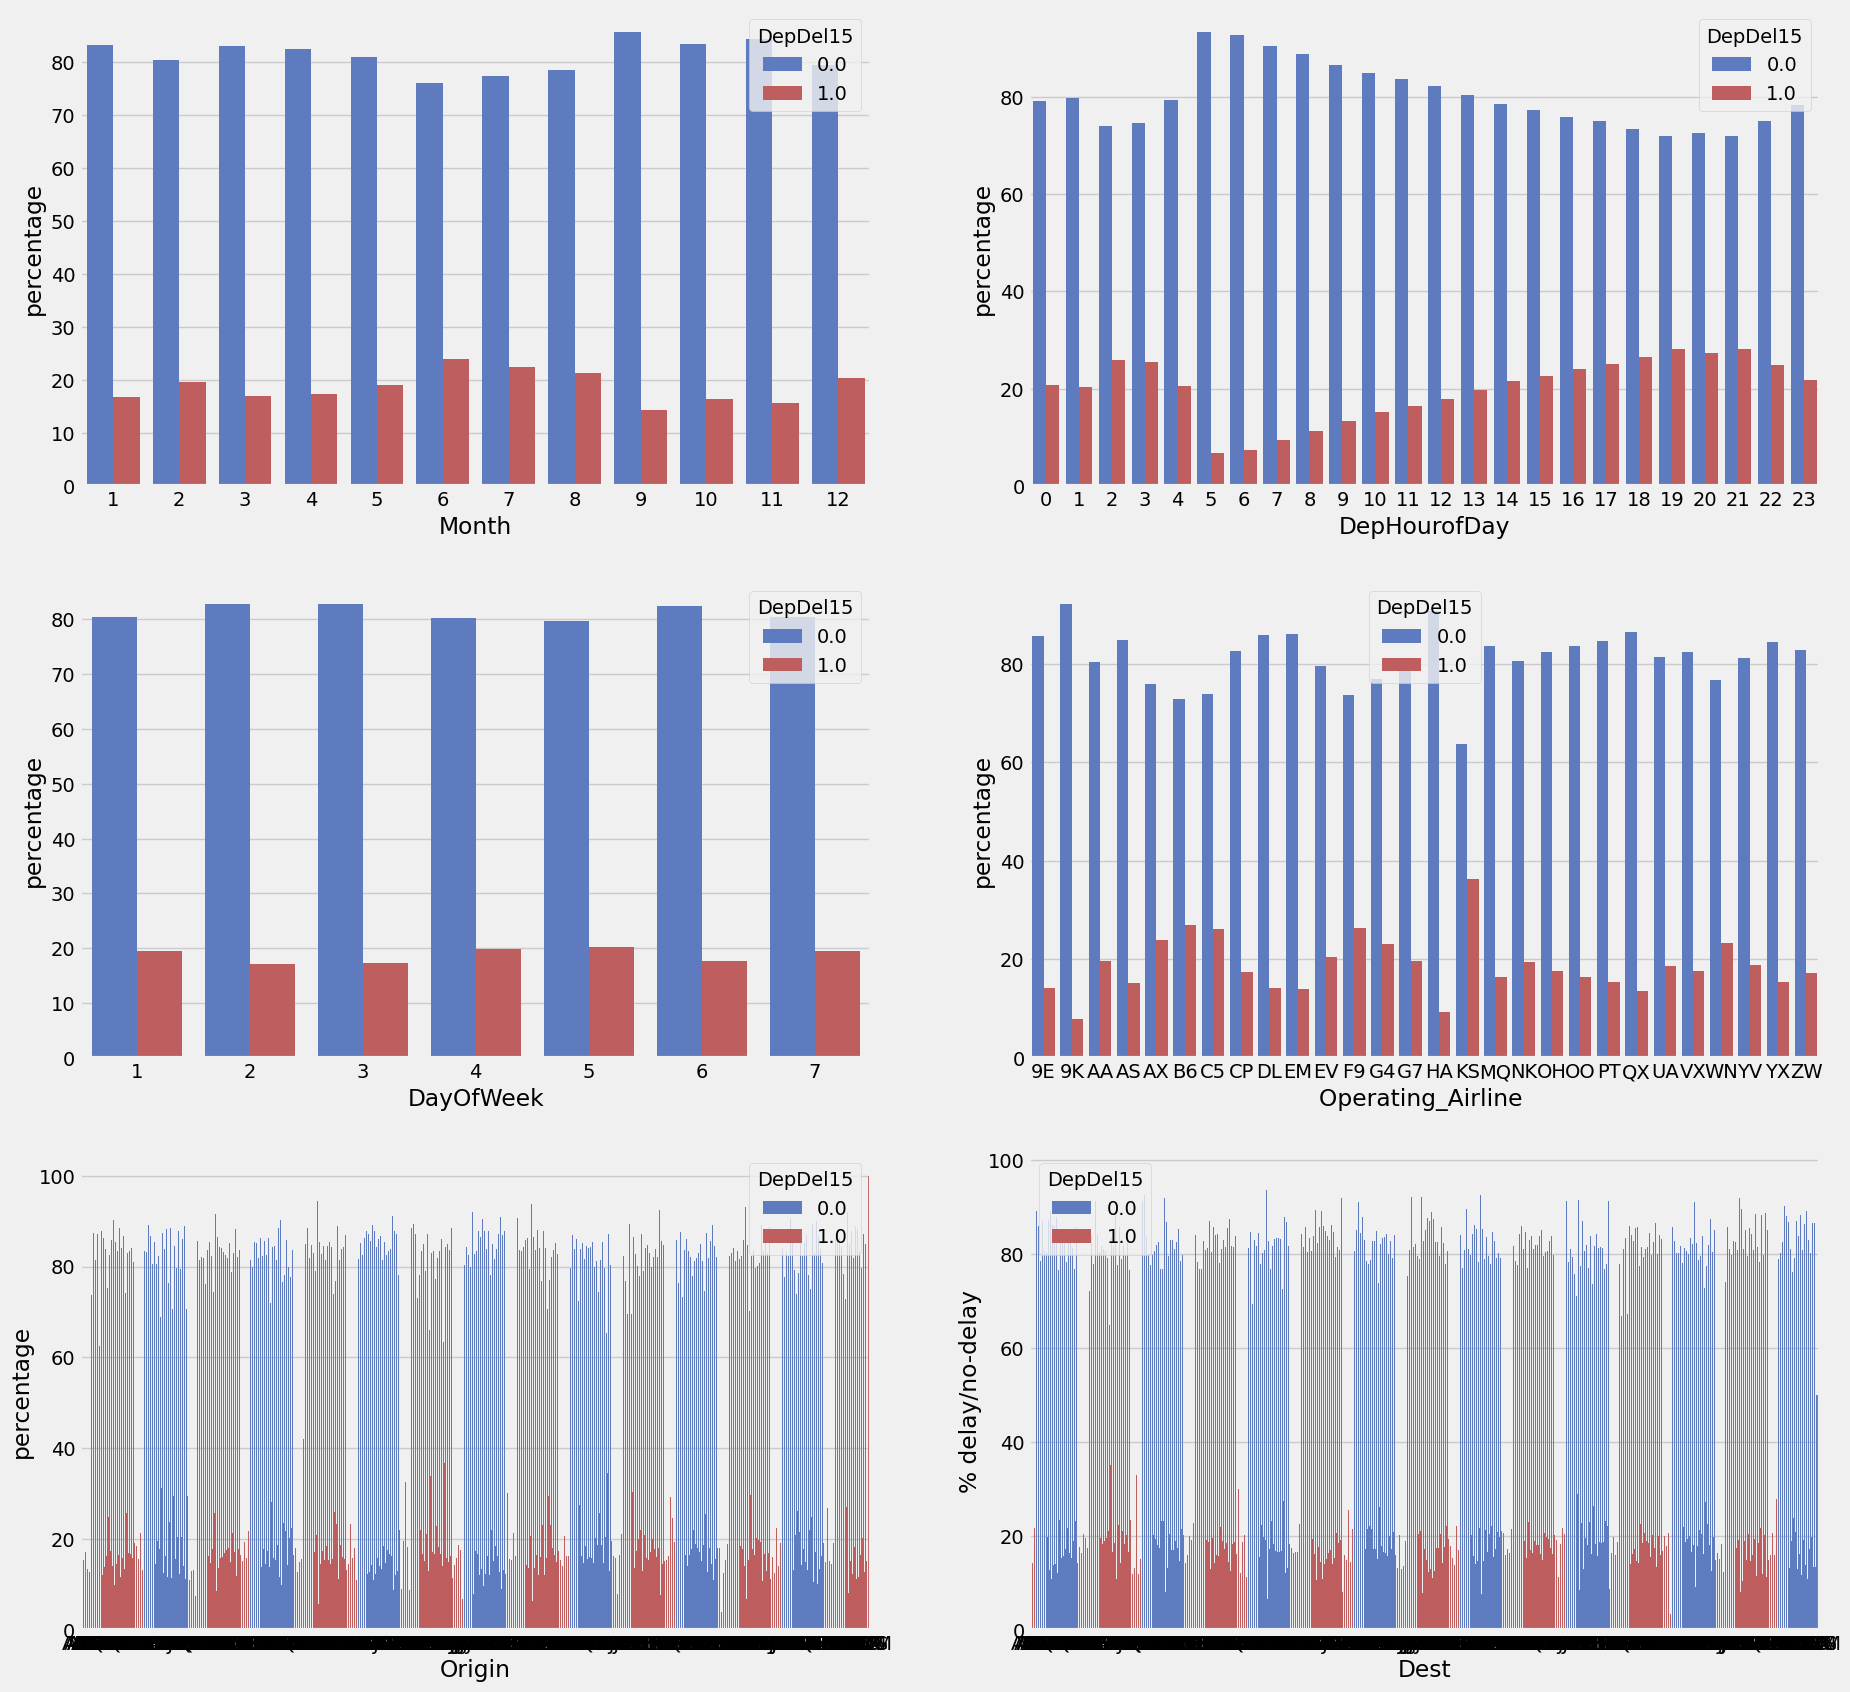

In [14]:
# This was written after the presentation of the Chart
display(md(
'> We have patterns present in the data set, these patterns\
related to data, which may be useful for the model. The time \
flight delays do not have a very high variation between them,\
in relation to origin and destination.'
))

viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Operating_Airline ', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
     ax = axes[idx//2, idx%2]
     temp = df2.groupby(column)['DepDel15'].value_counts(normalize=True).rename('percentage').\
     mul(100).reset_index().sort_values(column)
     sns.barplot(x=column, y="percentage", hue="DepDel15", data=temp, ax=ax, palette=['#4e75cf', '#cf4e4e'])
     plt.ylabel('% delay/no-delay')

plt.show()

> We do not have a relationship between distance and flight delay

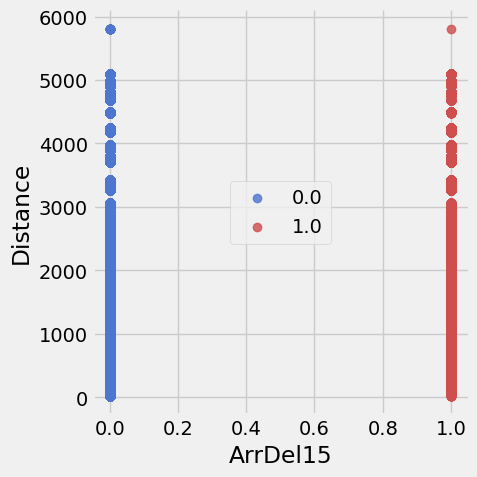

In [15]:
# This was written after the presentation of the Chart
display(md(
'> We do not have a relationship between distance and flight delay'
))

sns.lmplot( x="ArrDel15", y="Distance", data=df, fit_reg=False,
            hue='ArrDel15', legend=False, palette=['#4e75cf', '#cf4e4e'])

plt.legend(loc='center'), plt.xlabel('ArrDel15'), plt.ylabel('Distance')
plt.show()

# Taking the categorical columns from our data

In [16]:
# Backup
df_orig = df2.copy()

df2 = df2[['DepDel15', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Operating_Airline ', 'Origin', 'Dest','Distance','DepHourofDay']]

categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Operating_Airline ', 'Origin', 'Dest', 'DepHourofDay']

for ಠ_ಠ in categorical_columns:
    df2[ ಠ_ಠ ] = df2[ ಠ_ಠ ].astype('category')

In [17]:
subset_vals = ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO']

df2 = df2[df2["Operating_Airline "].isin(subset_vals)]

In [18]:
# Renaming our Target variable
df2.rename(columns = {'DepDel15':'target'}, inplace=True)

# Weather Data

In [6]:
weather = pd.read_csv('Weatherdata')
station = ['USW00023174','USW00012960','USW00003017','USW00094846','USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = {s:a for s,a in zip(station, airports)}
weather['airport'] = weather['STATION'].map(station_map)

In [7]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2018-01-01,18,0,NaN,NaN,138.0,194.0,89.0,LAX,01
1,USW00023174,2018-01-02,24,0,NaN,NaN,154.0,244.0,122.0,LAX,01
2,USW00023174,2018-01-03,22,0,NaN,NaN,167.0,244.0,122.0,LAX,01
3,USW00023174,2018-01-04,28,0,NaN,NaN,167.0,233.0,128.0,LAX,01
4,USW00023174,2018-01-05,26,0,NaN,NaN,168.0,206.0,133.0,LAX,01


# Checking for null values

In [8]:
weather.isnull().sum()

STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       4777
SNWD       4827
TAVG         32
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64

# Removing null values from Snow Columns

In [9]:
# Parse SNOW and SNOW DEPTH for missing values ​​using fillna()
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       32
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

In [10]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather.TAVG.isna()] 
TMAX_idx = idx[weather.TMAX.isna()] 
TMIN_idx = idx[weather.TMIN.isna()] 
TAVG_idx

array([ 4107,  4108,  4109,  4110,  4111,  4112,  4113,  4114,  4115,
        4116,  4117,  4118,  4119,  4120,  4121,  4122,  4123,  4124,
        4125,  4126,  4127,  4128,  4129,  4130,  4131,  4132,  4133,
        4134,  4135, 12561, 12715, 12716])

In [11]:
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,3.845161,81.232258,-66.838710
1,01,USW00003927,82.064516,143.180645,24.058065


# Computing and combining the average Temperature min and max to our Data

In [12]:
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

In [13]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

In [14]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

# Merging the weather data to our flight data

In [15]:
### Add origin weather conditions
df = pd.merge(df, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
df = pd.merge(df, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

In [16]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Flight_Number_Operating_Airline', 'Operating_Airline ',
       'DepartureDelayGroups', 'Origin', 'OriginState', 'Dest', 'DestState',
       'DepDelay', 'CRSDepTime', 'Cancelled', 'Diverted', 'Distance',
       'DistanceGroup', 'AirTime', 'DepHourofDay', 'AWND_O', 'PRCP_O',
       'SNOW_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

# Checking for null values

In [17]:
df.isnull().sum()

Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
FlightDate                         0
Flight_Number_Operating_Airline    0
Operating_Airline                  0
DepartureDelayGroups               0
Origin                             0
OriginState                        0
Dest                               0
DestState                          0
DepDelay                           0
CRSDepTime                         0
Cancelled                          0
Diverted                           0
Distance                           0
DistanceGroup                      0
AirTime                            0
DepHourofDay                       0
AWND_O                             0
PRCP_O                             0
SNOW_O                             0
TAVG_O                             0
AWND_D                             0
PRCP_D                             0
S

In [18]:
df3 = df[['DepartureDelayGroups', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Operating_Airline ', 'Origin', 'Dest','Distance','DepHourofDay', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]

# Handling null values in our final pre-processed data

In [19]:
df3.fillna(0,inplace=True)
df3.isnull().sum()

DepartureDelayGroups    0
Year                    0
Quarter                 0
Month                   0
DayofMonth              0
DayOfWeek               0
Operating_Airline       0
Origin                  0
Dest                    0
Distance                0
DepHourofDay            0
AWND_O                  0
PRCP_O                  0
TAVG_O                  0
AWND_D                  0
PRCP_D                  0
TAVG_D                  0
SNOW_O                  0
SNOW_D                  0
dtype: int64

In [20]:
display(md(f'#### {df.shape}'))
df3.columns

#### (1220336, 29)

Index(['DepartureDelayGroups', 'Year', 'Quarter', 'Month', 'DayofMonth',
       'DayOfWeek', 'Operating_Airline ', 'Origin', 'Dest', 'Distance',
       'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D',
       'TAVG_D', 'SNOW_O', 'SNOW_D'],
      dtype='object')

In [21]:
df3.rename(columns = {'DepartureDelayGroups':'target'}, inplace=True )
# df3.rename(columns = {'DepDelay30':'target2'}, inplace=True )
# df3.rename(columns = {'DepDelay45':'target3'}, inplace=True )
# df3.rename(columns = {'DepDelay60':'target4'}, inplace=True )

In [22]:
df3.to_parquet('newData.parquet')